<a href="https://colab.research.google.com/github/farzanehnia/Machine-learning-portfolio/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
#train = pd.read_csv('/content/train.csv')
#inputs
!rm train.csv

!wget --show-progress --continue -O /content/train.csv https://raw.github.com/farzanehnia/Machine-learning-portfolio/main/train.csv

train = pd.read_csv('train.csv')


--2022-08-24 20:54:02--  https://raw.github.com/farzanehnia/Machine-learning-portfolio/main/train.csv
Resolving raw.github.com (raw.github.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/farzanehnia/Machine-learning-portfolio/main/train.csv [following]
--2022-08-24 20:54:02--  https://raw.githubusercontent.com/farzanehnia/Machine-learning-portfolio/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘/content/train.csv’

/content/train.csv  100%[===================>]  59.76K  --.-KB/s    in 0.007s  

2022-08-24 20

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


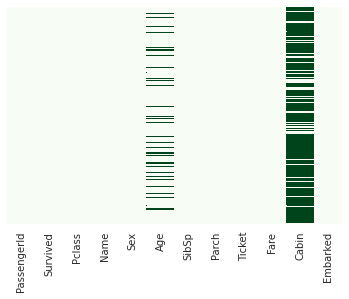

In [83]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='Greens')

ValueError: 'black' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'mag...

In [84]:
sns.set_style('whitegrid')

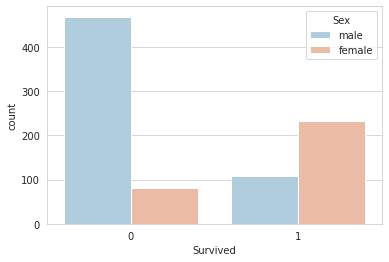

In [85]:
sns.countplot(x='Survived', hue='Sex', data= train, palette='RdBu_r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



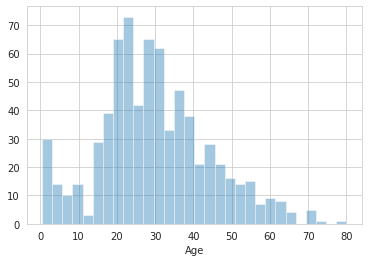

In [86]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

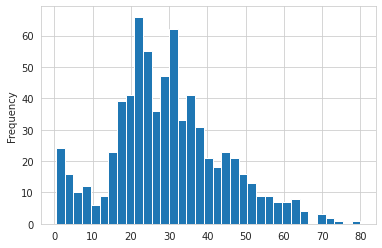

In [87]:
train['Age'].plot.hist(bins=35)

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


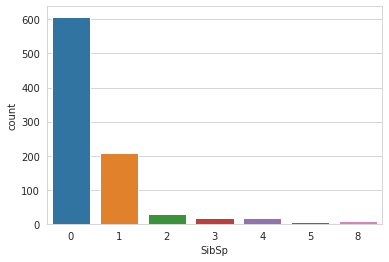

In [89]:
sns.countplot(x='SibSp', data=train)

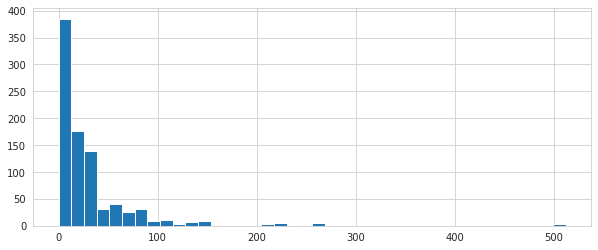

In [90]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [91]:
#Optional plotly Method Imports

import cufflinks as cf
cf.go_offline()

In [92]:
import plotly.io as pio
pio.renderers.default = "colab"

In [93]:
train['Fare'].iplot(kind='hist', bins=50)

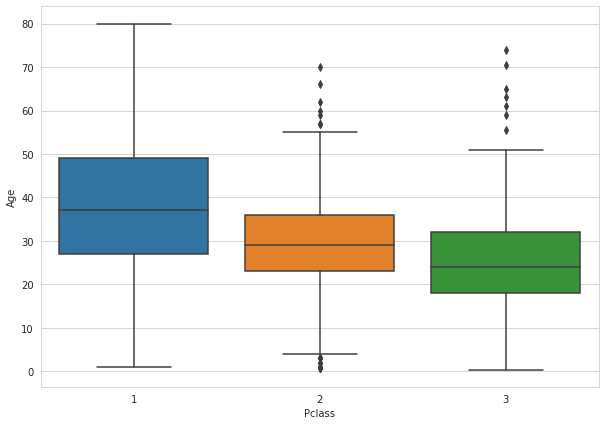

In [94]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train )

In [95]:
train [ train['Pclass'] == 3 ] ['Age'].mean()

25.14061971830986

In [96]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return 38.233440860215055

    elif Pclass == 2:
      return 29.87763005780347

    else:
      return 25.14061971830986
  else:
    return Age

In [97]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [98]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


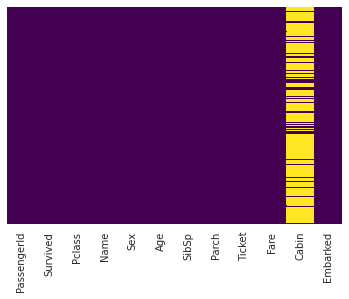

In [99]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [100]:
train.drop('Cabin', axis=1, inplace=True)

In [101]:
train.dropna(inplace=True)

In [102]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head(3)

,male
0,1
1,0
2,0


In [103]:
embark = pd.get_dummies(train['Embarked'], drop_first= True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [104]:
train = pd.concat([train, sex, embark], axis=1)

In [105]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True, errors='ignore')

In [106]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [107]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [108]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
logmodel = LogisticRegression()

In [114]:
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [115]:
predictions = logmodel.predict(X_test)

In [116]:
from sklearn.metrics import classification_report, confusion_matrix

--2022-08-24 21:02:09--  https://www.statisticssolutions.com/wp-content/uploads/2017/12/rachnovblog-1024x413.jpg
Resolving www.statisticssolutions.com (www.statisticssolutions.com)... 172.67.75.177, 104.26.6.142, 104.26.7.142, ...
Connecting to www.statisticssolutions.com (www.statisticssolutions.com)|172.67.75.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48085 (47K) [image/jpeg]
Saving to: ‘rachnovblog-1024x413.jpg.11’

rachnovblog-1024x41 100%[===================>]  46.96K  --.-KB/s    in 0.001s  

2022-08-24 21:02:09 (82.2 MB/s) - ‘rachnovblog-1024x413.jpg.11’ saved [48085/48085]



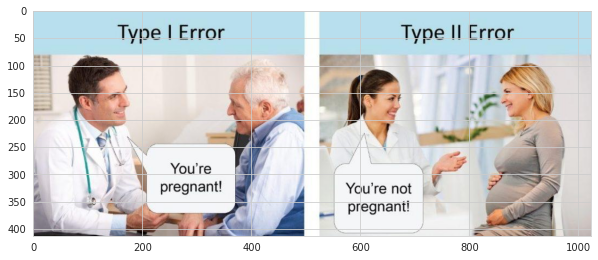

In [129]:
import cv2
!wget "https://www.statisticssolutions.com/wp-content/uploads/2017/12/rachnovblog-1024x413.jpg";
img = cv2.imread('rachnovblog-1024x413.jpg',-1);
plt.figure(figsize=(10,7))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Type one and type 2 errors

In [117]:
from pandas.core.indexes.frozen import pprint_thing
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



[[149  14]
 [ 31  73]]
